In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 

path = 'processed_data/'


In [2]:
bp = pd.read_csv(path+'bp_data.csv')
bp.shape

(514, 12)

In [3]:
ed = pd.read_csv(path+'ed_data.csv')
ed.shape

(514, 52)

In [4]:
geo = pd.read_csv(path+'geo_data.csv')
geo.shape

(514, 76)

In [5]:
lab = pd.read_csv(path+'lab_data.csv')
lab.shape

(514, 26)

In [6]:
visit = pd.read_csv(path+'visit_data.csv')
visit.shape

(514, 6)

In [7]:
mergecolumns = ['encrypt_mrn', 'ed_screened', 'visit_date', 'new_diagnosis', 'pcp_followup']

data = pd.merge(bp, ed, on=mergecolumns, how='left')
data = pd.merge(data, geo, on=mergecolumns, how='left')
data = pd.merge(data, lab, on=mergecolumns, how='left')
data = pd.merge(data, visit, on=mergecolumns, how='left')


In [8]:
data = data[data['new_diagnosis'] == 'Yes']
data.shape

(257, 152)

In [9]:
# follow up in data
data['pcp_followup'].value_counts()


pcp_followup
Yes    204
No      50
Name: count, dtype: int64

In [10]:
# follow up null 
data['pcp_followup'].isnull().sum()

3

In [11]:
# drop null
data = data.dropna(subset=['pcp_followup'])
data.shape

(254, 152)

In [12]:
data.to_csv('merged_data.csv', index=False)

In [13]:
list_bp = ['avg_dbp', 'avg_diff', 'avg_sbp', 'max_sbp']


In [14]:
list_ed = ['age', 'sex', 'language', 'insurance_type', 'primary_care', 
            'ed_name', 'bpa_response', 'htn_on_pl', 'htn_on_pmh', 
            'hld_on_pl', 'hld_on_pmh', 'family_dm', 'tobacco_user', 
            'htn_meds', 'statin_meds', 'disposition', 'detailed_race', 
            'weight', 'bmi', 'hba1c', 'height', 'sbp_1st', 'dbp_1st', 
            'poct_gluc']

In [15]:
list_lab = ['max_value_GLUCOSE', 'avg_value_GLUCOSE', 'max_value_CREATININE', 'min_value_CREATININE', 'min_value_GLUCOSE',  'avg_value_CREATININE', 'avg_value_HEMOGLOBIN A1C', 'max_value_HEMOGLOBIN A1C', 'min_value_HEMOGLOBIN A1C',  'min_value_GLUCOSE, POC', 'avg_value_GLUCOSE, POC', 'max_value_GLUCOSE, POC']

In [16]:
list_geo = [
    'po_box', 'homeless', 'total_pop', 'households', 'housing_units', 
    'p_children', 'p_elderly', 'p_adults', 'p_female', 'mdn_age', 
    'p_nhwhite', 'p_nhblack', 'p_hispanic', 'p_nhasian', 'p_other', 
    'p_moved', 'p_longcommute', 'p_marriednone', 'p_marriedkids', 
    'p_singlenone', 'p_malekids', 'p_femalekids', 'p_cohabitkids', 
    'p_nohsdeg', 'p_hsonly', 'p_somecollege', 'p_collegeplus', 
    'p_onlyenglish', 'p_spanishlimited', 'p_asianlimited', 'p_otherlimited', 
    'p_limitedall', 'p_notlimited', 'p_popbelow1fpl', 'p_popbelow2fpl', 
    'p_povmarriedfam', 'p_povmalefam', 'p_povfemalefam', 'hh_mdnincome', 
    'p_pubassist', 'p_foodstamps', 'p_assistorfood', 'p_unemployed', 
    'h_vacant', 'h_renter', 'h_occupants', 'h_novehicles', 'h_mdnrent', 
    'h_rentpercent', 'h_houseprice', 'p_private', 'p_medicare', 'p_medicaid', 
    'p_otherinsur', 'p_uninsured', 'h_nointernet', 'h_nocomputer', 
    'p_foreign', 'p_disabled'
]

In [17]:
list_visit = ['visit_type']

In [18]:
lists = list_bp+ list_ed+ list_lab+ list_geo+ list_visit
X_all = data[lists]
y = data['pcp_followup'].map({'Yes': 1, 'No': 0}).fillna(0)
y = np.array(y).astype(int)

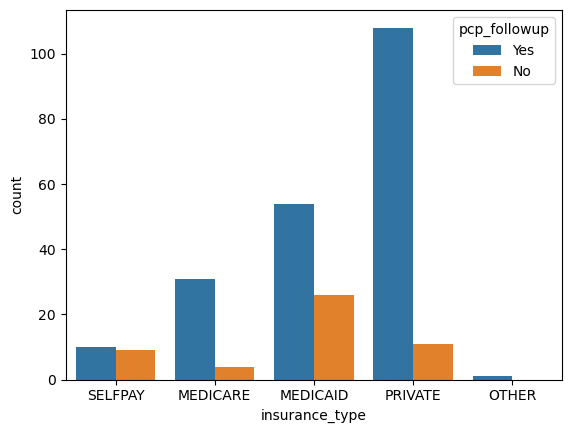

In [19]:
sns.countplot(data=data, x='insurance_type', hue='pcp_followup')
plt.show()


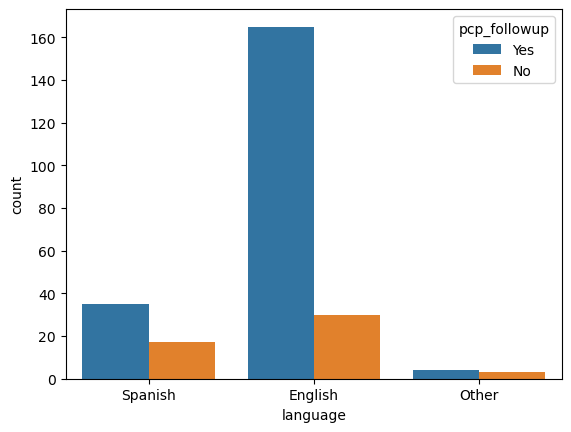

In [20]:
sns.countplot(data=data, x='language', hue='pcp_followup')
plt.show()

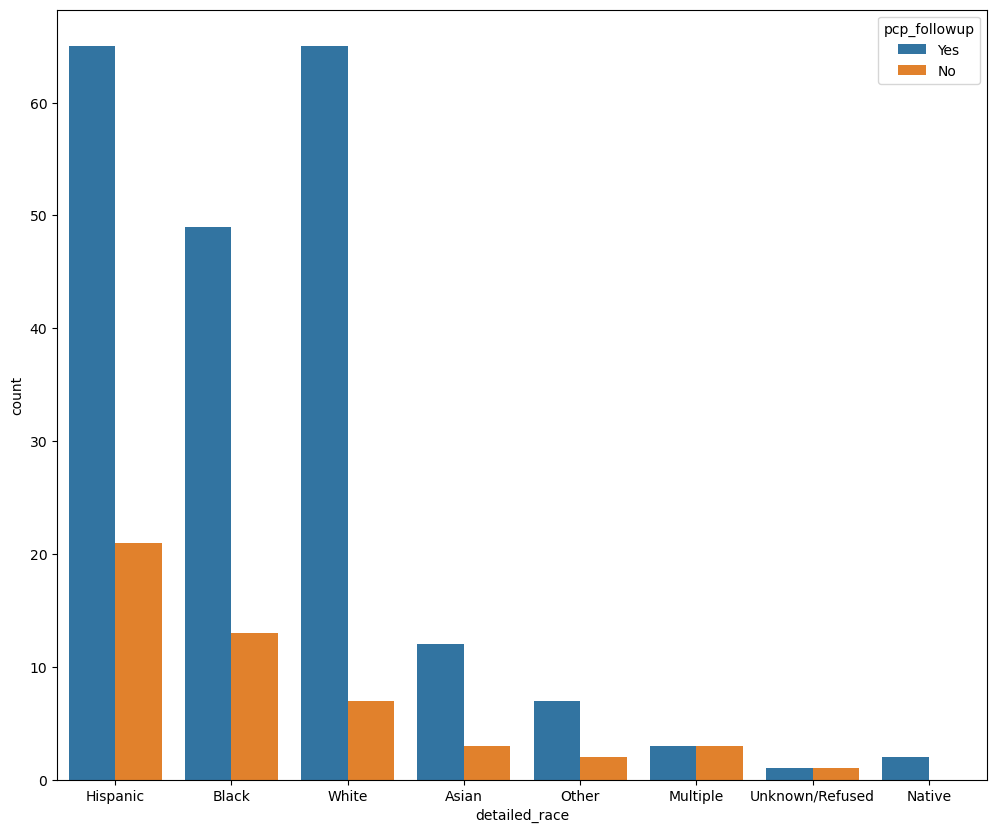

In [21]:
plt.figure(figsize=(12, 10))
sns.countplot(data=data, x='detailed_race', hue='pcp_followup')
plt.show()

In [22]:
temp = data.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = temp[lists].select_dtypes(include=['number'])
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
temp[X.columns] = X_scaled

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def analyze_and_plot_distribution(selected_features):
    for feature in selected_features:
        plt.figure(figsize=(8, 5))
        hue_column = 'pcp_followup'

        if pd.api.types.is_numeric_dtype(temp[feature]):
            for group in temp[hue_column].unique():
                group_data = temp[temp[hue_column] == group][feature]
                mean_val = group_data.mean()
                median_val = group_data.median()
                q1 = group_data.quantile(0.25)
                q3 = group_data.quantile(0.75)
                
                print(f"\nStatistics for {feature} ({group}):")
                print(f"Mean: {mean_val:.2f}")
                print(f"Median: {median_val:.2f}")
                print(f"Q1 (25th percentile): {q1:.2f}")
                print(f"Q3 (75th percentile): {q3:.2f}")
            
            sns.histplot(data=temp, x=feature, hue=hue_column, kde=True, bins=30, palette='Set2')
            plt.title(f'Distribution of {feature} by {hue_column.capitalize()}')
        
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.legend(title=hue_column.capitalize())
        plt.tight_layout()
        plt.show()




Statistics for avg_value_HEMOGLOBIN A1C (Yes):
Mean: 0.05
Median: -0.31
Q1 (25th percentile): -0.90
Q3 (75th percentile): 0.74

Statistics for avg_value_HEMOGLOBIN A1C (No):
Mean: 0.08
Median: -0.47
Q1 (25th percentile): -0.90
Q3 (75th percentile): 0.94


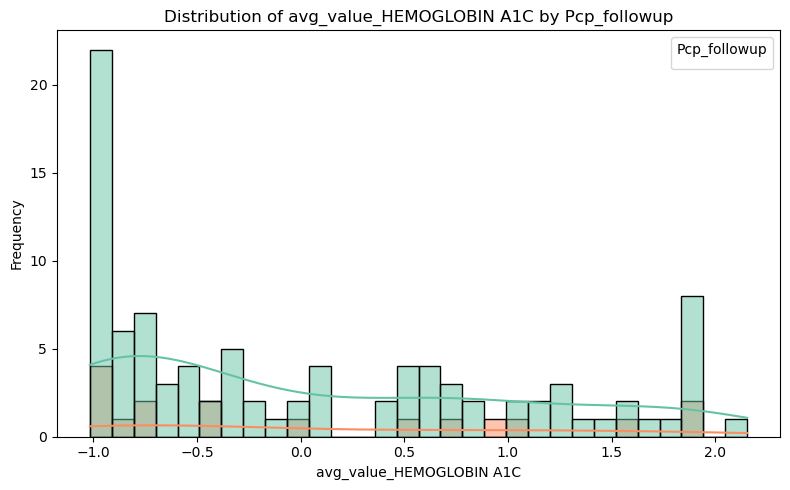

In [23]:
analyze_and_plot_distribution(['avg_value_HEMOGLOBIN A1C'])


Statistics for avg_value_CREATININE (Yes):
Mean: 0.02
Median: -0.20
Q1 (25th percentile): -0.50
Q3 (75th percentile): 0.32

Statistics for avg_value_CREATININE (No):
Mean: -0.24
Median: -0.24
Q1 (25th percentile): -0.56
Q3 (75th percentile): 0.01


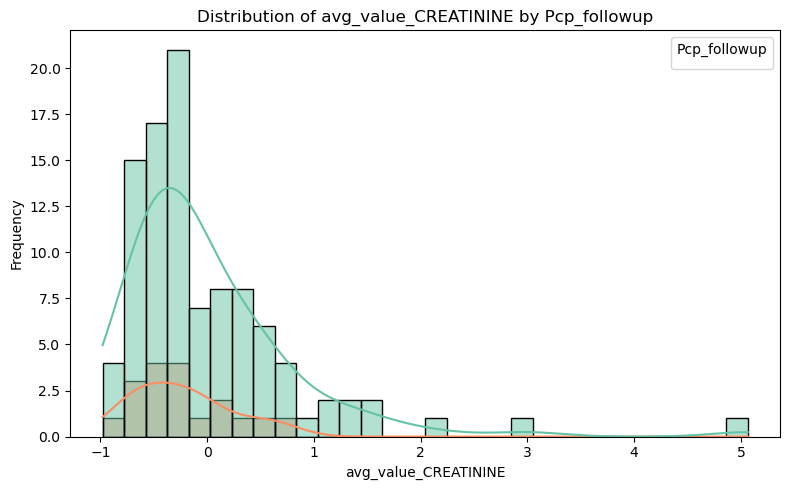

In [24]:
analyze_and_plot_distribution(['avg_value_CREATININE'])


Statistics for avg_value_GLUCOSE, POC (Yes):
Mean: 0.01
Median: -0.10
Q1 (25th percentile): -0.73
Q3 (75th percentile): 0.40

Statistics for avg_value_GLUCOSE, POC (No):
Mean: -0.08
Median: 0.08
Q1 (25th percentile): -0.41
Q3 (75th percentile): 0.61


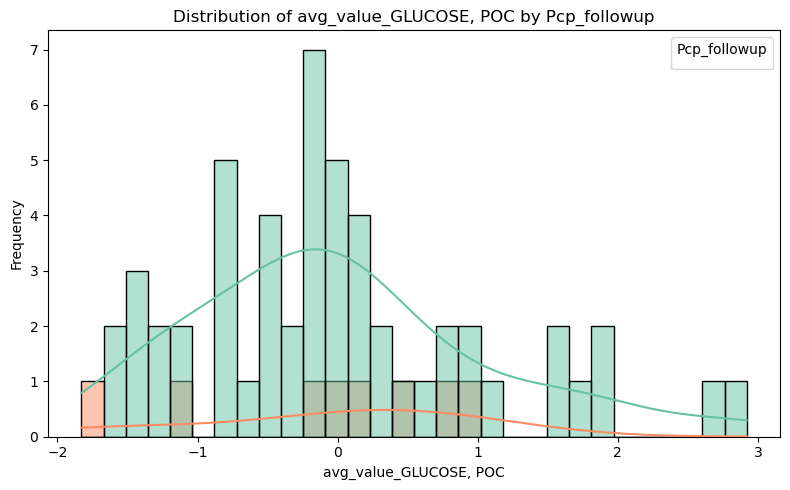

In [25]:
analyze_and_plot_distribution(['avg_value_GLUCOSE, POC'])


Statistics for avg_value_GLUCOSE (Yes):
Mean: 0.08
Median: -0.21
Q1 (25th percentile): -0.78
Q3 (75th percentile): 0.57

Statistics for avg_value_GLUCOSE (No):
Mean: -0.16
Median: -0.28
Q1 (25th percentile): -0.79
Q3 (75th percentile): 0.36


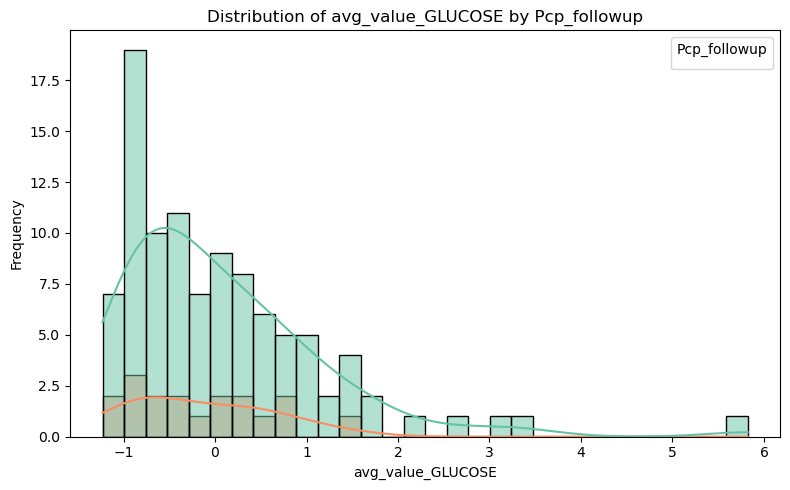

In [26]:
analyze_and_plot_distribution(['avg_value_GLUCOSE'])


Statistics for avg_dbp (Yes):
Mean: 0.10
Median: 0.09
Q1 (25th percentile): -0.53
Q3 (75th percentile): 0.75

Statistics for avg_dbp (No):
Mean: 0.11
Median: 0.06
Q1 (25th percentile): -0.62
Q3 (75th percentile): 0.42


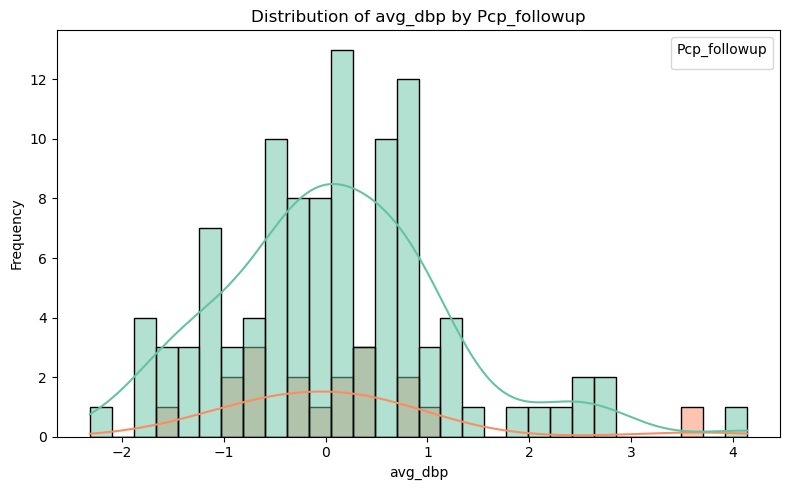

In [27]:
analyze_and_plot_distribution(['avg_dbp'])


Statistics for avg_sbp (Yes):
Mean: 0.03
Median: -0.09
Q1 (25th percentile): -0.68
Q3 (75th percentile): 0.64

Statistics for avg_sbp (No):
Mean: -0.15
Median: -0.28
Q1 (25th percentile): -0.81
Q3 (75th percentile): 0.09


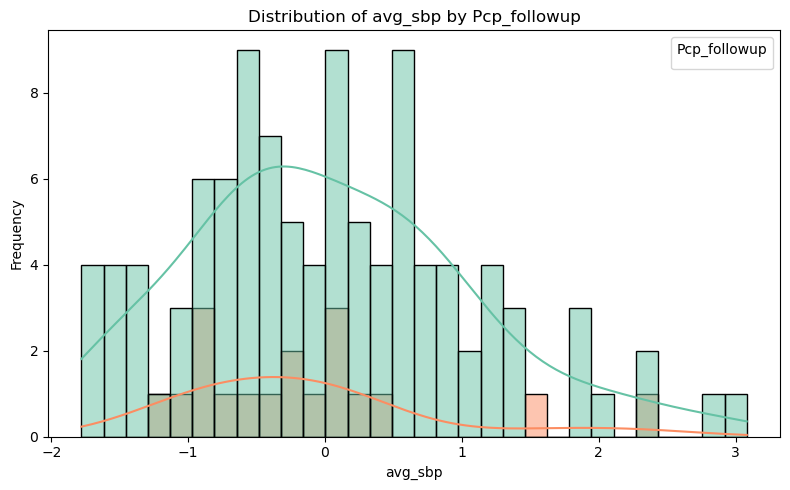

In [28]:
analyze_and_plot_distribution(['avg_sbp'])


Statistics for avg_diff (Yes):
Mean: -0.05
Median: -0.16
Q1 (25th percentile): -0.70
Q3 (75th percentile): 0.40

Statistics for avg_diff (No):
Mean: -0.28
Median: -0.61
Q1 (25th percentile): -0.92
Q3 (75th percentile): -0.05


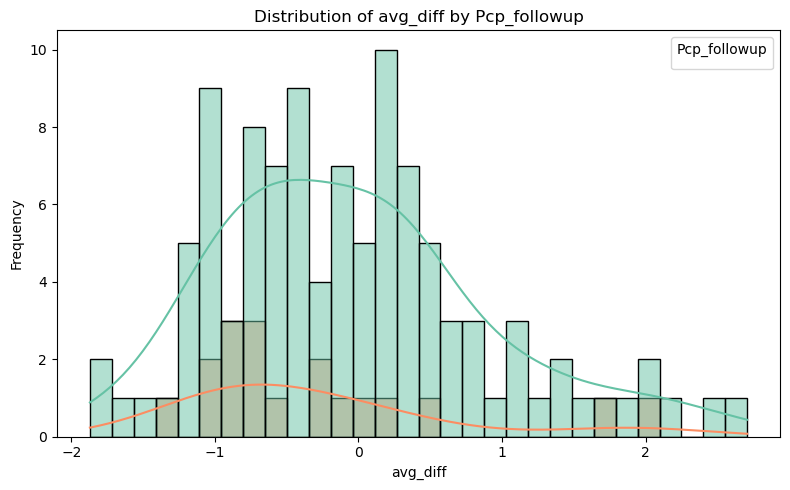

In [29]:
analyze_and_plot_distribution(['avg_diff'])


Statistics for max_sbp (Yes):
Mean: 0.02
Median: -0.01
Q1 (25th percentile): -0.80
Q3 (75th percentile): 0.56

Statistics for max_sbp (No):
Mean: -0.11
Median: -0.40
Q1 (25th percentile): -0.69
Q3 (75th percentile): 0.39


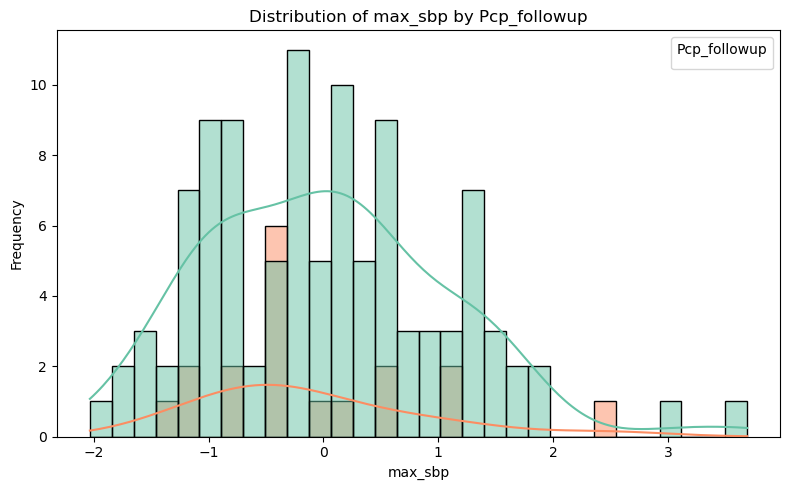

In [30]:
analyze_and_plot_distribution(['max_sbp'])


Statistics for p_longcommute (Yes):
Mean: -0.11
Median: -0.27
Q1 (25th percentile): -0.69
Q3 (75th percentile): 0.22

Statistics for p_longcommute (No):
Mean: 0.39
Median: 0.33
Q1 (25th percentile): -0.60
Q3 (75th percentile): 1.09


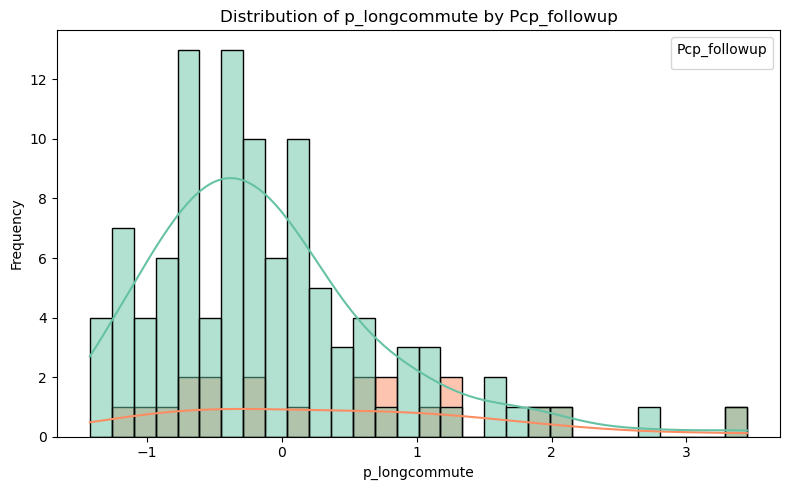

In [31]:
analyze_and_plot_distribution(['p_longcommute'])